<a href="https://colab.research.google.com/github/AliAkbarBadri/complex-networks-basics/blob/main/network_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setuping

In [37]:
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
import collections

In [31]:
! wget "https://github.com/AliAkbarBadri/complex-networks-basics/blob/main/facebook101_princton_weighted.mat?raw=true" -O "facebook101_princton_weighted.mat"

--2020-11-26 20:29:04--  https://github.com/AliAkbarBadri/complex-networks-basics/blob/main/facebook101_princton_weighted.mat?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AliAkbarBadri/complex-networks-basics/raw/main/facebook101_princton_weighted.mat [following]
--2020-11-26 20:29:04--  https://github.com/AliAkbarBadri/complex-networks-basics/raw/main/facebook101_princton_weighted.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AliAkbarBadri/complex-networks-basics/main/facebook101_princton_weighted.mat [following]
--2020-11-26 20:29:05--  https://raw.githubusercontent.com/AliAkbarBadri/complex-networks-basics/main/facebook101_princton_weighted.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.1

# Reading Data

In [32]:
mat = scipy.io.loadmat('facebook101_princton_weighted.mat')
print(mat.keys())
print(mat['A'].shape[0])
print(mat['A'])

dict_keys(['__header__', '__version__', '__globals__', 'A'])
6596
  (41, 0)	0.23341986187511532
  (74, 0)	-0.8310836341707424
  (183, 0)	0.3630774693417993
  (199, 0)	-0.4255819109410841
  (330, 0)	-0.8915522179046713
  (342, 0)	0.6004699460747422
  (438, 0)	0.559033155005757
  (638, 0)	-0.15789912487319158
  (639, 0)	-0.3689795200377264
  (700, 0)	0.667096028355807
  (762, 0)	0.6388290129260563
  (790, 0)	-0.5971903653879409
  (813, 0)	-0.9203448232766431
  (908, 0)	-0.5661217215565775
  (1001, 0)	-0.40887388509123834
  (1074, 0)	0.14383939484847108
  (1084, 0)	0.4229554254707699
  (1179, 0)	0.3118105095583956
  (1195, 0)	0.014127530389211218
  (1226, 0)	-0.47309716640306787
  (1252, 0)	-0.013995007645000168
  (1343, 0)	-0.3969440595287481
  (1415, 0)	0.49268599971253546
  (1435, 0)	-0.21118357393040132
  (1489, 0)	-0.250254338391553
  :	:
  (3083, 6595)	-0.2566179533318984
  (3255, 6595)	-0.16483967626475793
  (3311, 6595)	-0.9284036578868178
  (3487, 6595)	0.9428205382791961
  (3647

In [33]:
G = nx.from_scipy_sparse_matrix(mat['A'])
print(G.number_of_nodes())

6596


In [39]:
G.number_of_edges()

293320

In [34]:
G.get_edge_data(6568,6595)

{'weight': -0.05460279445991589}

# Plotting Degree Distribution

http://snap.stanford.edu/class/cs224w-2012/nx_tutorial.pdf

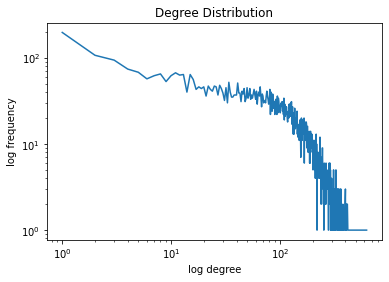

In [43]:
degs = {}
for n in G.nodes():
  deg = G.degree(n) 
  if deg not in degs:
    degs[deg] = 0 
  degs[deg] += 1
items = sorted(degs.items())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xlabel("log degree")
ax.set_ylabel("log frequency")
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Degree Distribution")
plt.show()

# fig.savefig("degree_distribution.png")

# Plotting Eigen Value Distribution